In [1]:
from datetime import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import regex as re


# Q1.

In [2]:
merged_csv = pd.read_csv('Merge.csv',delimiter=',')
merged_csv['Datetime'] = pd.to_datetime(merged_csv['Datetime'])
#merged_csv['Date'] = merged_csv['Datetime'].dt.date
condition = ((merged_csv['Datetime'].dt.time >= time(7,0,0)) & (merged_csv['Datetime'].dt.time <= time(17,0,0)))
merged_csv['res_time'] = merged_csv['Datetime'].dt.time.mask(condition,True)
tenmin_60min = merged_csv[merged_csv.res_time == True]
tenmin_60min['idx'] = tenmin_60min.groupby([pd.Grouper(key='Datetime', freq='2H', origin='start'),'Resolution']).ngroup()
tenmin_60min.set_index('idx',inplace=True)
tenmin_60min.sort_index()
tenmin_60min['mean']= tenmin_60min.groupby(tenmin_60min.index).mean()
oneday_res = merged_csv[merged_csv.res_time != True]
oneday_res.ffill()
tenmin_60min.ffill()

/home/maz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/maz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Resolution,Datetime,Price,res_time,mean
idx,,,,,
0,10MIN,2021-11-01 07:00:00,70.000,True,70.8575
0,10MIN,2021-11-01 07:10:00,70.000,True,70.8575
0,10MIN,2021-11-01 07:20:00,71.500,True,70.8575
0,10MIN,2021-11-01 07:30:00,71.375,True,70.8575
0,10MIN,2021-11-01 07:40:00,71.375,True,70.8575
...,...,...,...,...,...
215,1H,2021-11-30 12:00:00,95.975,True,96.3625
217,1H,2021-11-30 13:00:00,96.775,True,97.3125
217,1H,2021-11-30 14:00:00,97.850,True,97.3125


# Q2 a) Create dataframe with mm-dd index

In [3]:
consumption_csv =  pd.read_csv('Consumption.csv',delimiter=',')
consumption_csv['Date'] = pd.to_datetime(consumption_csv['Date'],dayfirst=True)
consumption_csv['Year'] = consumption_csv['Date'].dt.year
consumption_csv['dd'] = consumption_csv['Date'].dt.day
consumption_csv['mm'] = consumption_csv['Date'].dt.month
consumption_csv.head()

,Date,Consumption,Year,dd,mm
0,2016-01-01,276.2910,2016,1,1
1,2016-01-02,294.6780,2016,2,1
2,2016-01-03,306.3096,2016,3,1
3,2016-01-04,370.0566,2016,4,1
4,2016-01-05,367.3998,2016,5,1


In [4]:
##pandas dataframe to show consumption each year
table = pd.pivot_table(consumption_csv,index=['mm','dd'],values='Consumption',columns=['Year'],aggfunc=np.sum)
table.head()


Year       2016      2017      2018      2019      2020      2021      2022
mm dd                                                                      
1  1   276.2910  339.5196  305.9370  313.6320  344.9952  344.0718  246.6612
   2   294.6780  405.7614  365.8932  391.3758  380.8296  362.9772  263.8980
   3   306.3096  407.3976  368.2746  424.1646  356.8698  365.1480  316.3698
   4   370.0566  419.0454  372.1140  404.0766  348.2028  436.0716  348.6078
   5   367.3998  457.1640  367.8534  364.0140  357.5502  446.6340  360.4338

# Q2 b) Plots

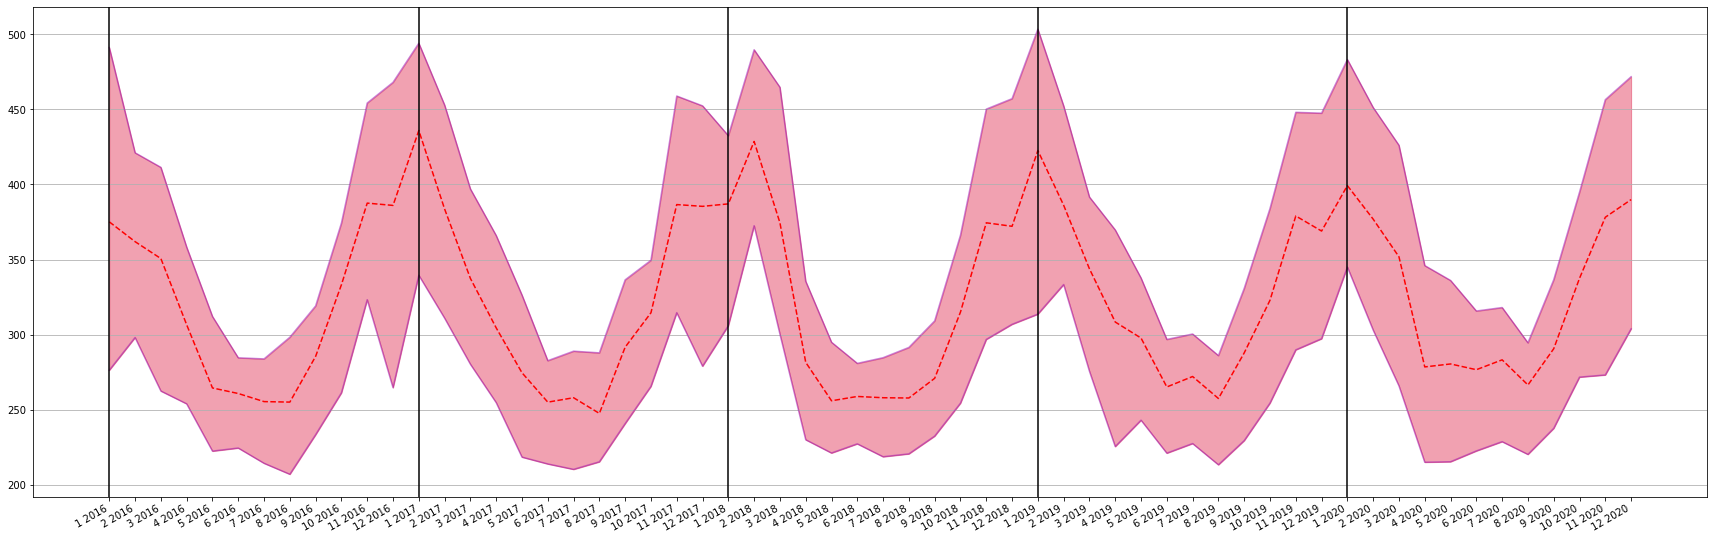

In [5]:
grouped_consumption = consumption_csv.drop(columns=['dd']).groupby(['Year','mm']).agg({'Consumption': ['min','max','mean']})
grouped_consumption_five_year = grouped_consumption.drop([2021,2022],axis=0)
fig,ax = plt.subplots()
fig.set_size_inches(30,10)
xlabel = [f'{a}'+' '+f'{b}' for index, (b,a) in enumerate(grouped_consumption_five_year.index.to_list())]
ax.plot(grouped_consumption_five_year['Consumption']['min'].tolist(),'-',color='#9a0bad',alpha=0.5)
ax.plot(grouped_consumption_five_year['Consumption']['max'].tolist(),'-',color='#9a0bad',alpha=0.5)
ax.fill_between(list(range(0,len(grouped_consumption_five_year))),grouped_consumption_five_year['Consumption']['min'],grouped_consumption_five_year['Consumption']['max'],color='crimson',alpha=0.4)
ax.plot(grouped_consumption_five_year['Consumption']['mean'].tolist(),'--',color='red')
xcoords = ['1 2016','1 2017','1 2018','1 2019', '1 2020']
ax.set_xticks(np.arange(len(xlabel)))
ax.set_xticklabels(xlabel)
#ax.set_yticklabels(['min','max','mean'])
for index,xc in enumerate(xlabel):
    if xc in xcoords:
        ax.axvline(x=index,color='black')
ax.grid(axis='y')
ax.xaxis_date()
fig.autofmt_xdate()

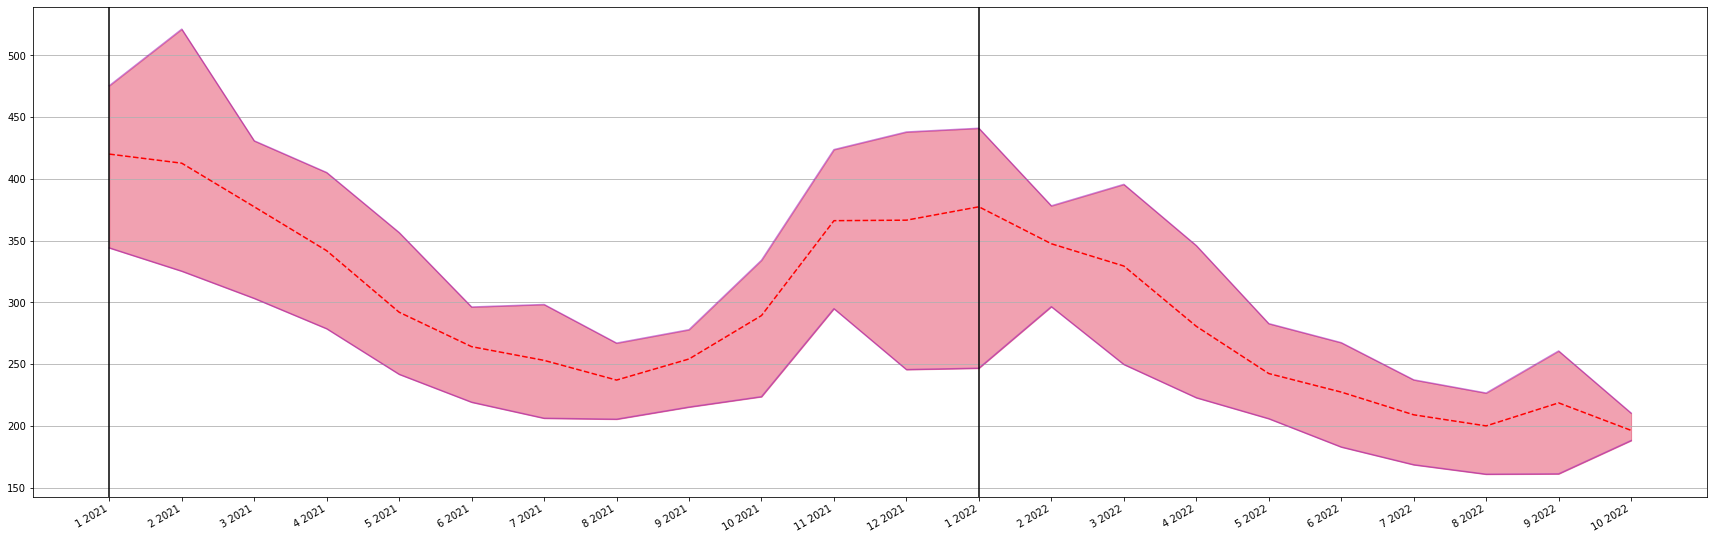

In [6]:
fig,ax = plt.subplots()
fig.set_size_inches(30,10)
grouped_consumption_two_year = consumption_csv.drop(columns=['dd']).groupby(['Year','mm']).agg({'Consumption': ['min','max','mean']}).drop([2016,2017,2018,2019,2020],axis=0)
ax.plot(grouped_consumption_two_year['Consumption']['min'].tolist(),'-',color='#9a0bad',alpha=0.5)
ax.plot(grouped_consumption_two_year['Consumption']['max'].tolist(),'-',color='#9a0bad',alpha=0.5)
ax.fill_between(list(range(0,len(grouped_consumption_two_year))),grouped_consumption_two_year['Consumption']['min'],grouped_consumption_two_year['Consumption']['max'],color='crimson',alpha=0.4)
ax.plot(grouped_consumption_two_year['Consumption']['mean'].tolist(),'--',color='red')
xcoords = ['1 2021','1 2022']
xlabel = [f'{a}'+' '+f'{b}' for index, (b,a) in enumerate(grouped_consumption_two_year.index.to_list())]
ax.set_xticks(np.arange(len(xlabel)))
ax.set_xticklabels(xlabel)
#ax.set_yticklabels(['min','max','mean'])
for index,xc in enumerate(xlabel):
    if xc in xcoords:
        ax.axvline(x=index,color='black')
ax.grid(axis='y')
ax.xaxis_date()
fig.autofmt_xdate()

Years 2016 - 2020 have a seasonality pattern, with the minimum consumption occuring mid year and peaking towards the start and end of the year.
2021 displays similar behaviour but in 2022 the "sinusodial" wave is not present with the mean showing a downward movement of consumption from beginning to end of the year.

In [7]:
def clean_number_string(string_data):
    output = ''
    if string_data == '':
        return 

    search_object = re.search(r'^([\s]*([\d][\s]*){1,3})(\,[\s]*([\d][\s]*){3})(,[\s]*([\d][\s]*){3})*',string_data)
    
    while len(string_data) != 0 and search_object != None:
        search_object_span = search_object.span()
        f_id, l_id = search_object_span[0], search_object_span[1]
        cleaned_string = re.sub(r'\s+','',string_data[f_id:l_id])
        output += cleaned_string + ' '
        string_data = string_data[l_id:]
        search_object = re.search(r'^([\s]*([\d][\s]*){1,3})(\,[\s]*([\d][\s]*){3})(,[\s]*([\d][\s]*){3})*',string_data)
    
    return output   

In [8]:
print(clean_number_string('123,5 4 3 231,2 47 44,56 8,1 231,234'))

123,543 231,247 44,568,123 1,234 


In [31]:
class OHLCCreate():
    def __init__(self):
        self.data = pd.read_csv('Trades.csv',delimiter=',')
        self.products = self.create_dict_products()

    def create_dict_products(self):
        unique_products = self.data.Product.unique().flatten()
        output = {}
        for elem in unique_products:
            if elem not in output:
                output[elem] = 1

        return output

    def tocombinedata(self,product):
        if isinstance(product,list):
            if len({'Emission - Venue A'}.intersection(set(product))) > 0:
                if len({'Emission - Venue B'}.intersection(set(product))) > 0:
                    return (False, None)
                else:
                    return (True, product + ['Emission - Venue B'])

            if len({'Emission - Venue B'}.intersection(set(product))) > 0:
                if len({'Emission - Venue A'}.intersection(set(product))) > 0:
                    return (False, None)
                else:
                    return (True, product + ['Emission - Venue A'])
                    
        else:
            if 'Emission - Venue A' == product:
                return (True, [product] + ['Emission - Venue B'])
            if 'Emission - Venue B' == product:
                return (True, [product] + ['Emission - Venue A'])

        return (False,None)


    def create_ohlc_volume(self,begin,end,product,freq):
        ##error checker
        if isinstance(product,list):
            if len(set(product).intersection(set(tuple(self.products)))) != len(product):
                raise TypeError('Wrong Product name input')
        else:
            if product not in self.products:
                raise TypeError('Wrong Product name input')

        (bool_to_combine, product_dataset) =  self.tocombinedata(product)
        if bool_to_combine:
            product = product_dataset.copy()
           # print(product,bool_to_combine)

        if isinstance(product,str):
            data_product = self.data[self.data['Product'] == product]
        elif isinstance(product,list):
            data_product = self.data[self.data['Product'].isin(product)]

        if bool_to_combine:
            data_product['Product'] = data_product['Product'].apply(lambda x : 'Emission' if 'Emission' in x else x)
          
        data_product['TradeDateTime'] = pd.to_datetime(data_product['TradeDateTime'])
            
        if 'H' in freq or 'T' in freq or 'min' in freq or 'S' in freq or 'ms' in freq or 'L' in freq or 'U' in freq or 'us' in freq or 'N' in freq:
            condition = ((data_product['TradeDateTime'].dt.time >= time(7,0,0)) & (data_product['TradeDateTime'].dt.time <= time(17,0,0)))
            data_product['res_time'] = data_product['TradeDateTime'].dt.time.mask(condition,True)
            data_product = data_product[data_product.res_time == True]

        data_product['year_month_date'] = data_product['TradeDateTime'].dt.to_period('D')
        data_product.to_csv('check_1.csv')
        #data_product = data_product.groupby(pd.Grouper(key='TradeDateTime',freq=freq,origin='start')).mean()
        data_product.to_csv('check_2.csv')

        
        data_product.sort_values(by='TradeDateTime', inplace=True)
        print("contract list", data_product.Contract.unique().flatten())
        if len(data_product.Contract.unique().flatten()) > 1:
            data_ohlc = data_product.groupby(['Contract',pd.Grouper(key='TradeDateTime',freq=freq,origin='start')]).agg({'Price': ['min','max','first','last']})
        else:
            data_ohlc = data_product.groupby(pd.Grouper(key='TradeDateTime',freq=freq,origin='start')).agg({'Price': ['min','max','first','last']})

        data_ohlc.to_csv('data_ohlc.csv')
        
        data_product = data_product[(data_product['TradeDateTime'] >= begin ) & (data_product['TradeDateTime'] <= end)]
        data_volume_contract = data_product.groupby(['Product','Contract']).agg({'Quantity':'sum'})
        data_volume_contract.to_csv('data_volume.csv')

        return data_ohlc,data_volume_contract




In [32]:
ohlc_data, total_volume_data = OHLCCreate().create_ohlc_volume('2022-04-18 00:38','2022-04-22 22:00',['Emission - Venue A','Energy'],'15min')

contract list ['Q01' 'M01' 'DA']


In [33]:
ohlc_data.head(1000)

Price                             
                                   min       max     first     last
Contract TradeDateTime                                             
DA       2022-04-18 08:15:00  19.25000  19.41875  19.41875  19.2500
         2022-04-18 08:30:00  19.16250  19.30000  19.25000  19.3000
         2022-04-18 08:45:00  19.24375  19.30000  19.25000  19.2625
         2022-04-18 09:00:00  19.26250  19.47500  19.26250  19.4000
         2022-04-18 09:15:00  19.38750  19.45000  19.38750  19.4500
...                                ...       ...       ...      ...
Q01      2022-04-21 15:45:00  22.49000  22.60750  22.58000  22.5600
         2022-04-21 16:00:00  22.56250  22.74000  22.57250  22.7225
         2022-04-21 16:15:00  22.68000  22.86250  22.71000  22.8600
         2022-04-21 16:30:00  22.79500  22.86250  22.84500  22.8100
         2022-04-21 16:45:00  22.68750  22.80750  22.80000  22.7975

[447 rows x 4 columns]

In [34]:
total_volume_data.head()

Quantity
Product  Contract          
Emission DA          485670
         M01          35578
Energy   Q01          91377